<a href="https://colab.research.google.com/github/Aditya-Kopulwar/Data-Science-Assignments/blob/main/Assignment_17_Support%20Vector%20Machines/Code/Q2_forestfires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify The Size_Categorie Using SVM

## Data Description:

- month :	month of the year: 'jan' to 'dec'
- day :	day of the week: 'mon' to 'sun'
- FFMC :	FFMC index from the FWI system: 18.7 to 96.20
- DMC :	DMC index from the FWI system: 1.1 to 291.3
- DC :	DC index from the FWI system: 7.9 to 860.6
- ISI :	ISI index from the FWI system: 0.0 to 56.10
- temp :	temperature in Celsius degrees: 2.2 to 33.30
- RH :	relative humidity in %: 15.0 to 100
- wind :	wind speed in km/h: 0.40 to 9.40
- rain :	outside rain in mm/m2 : 0.0 to 6.4
- Size_Categorie : 	the burned area of the forest ( Small , Large)

## Attaching Resources

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

### Adding Dataset

In [2]:
ff = pd.read_csv('https://raw.githubusercontent.com/Aditya-Kopulwar/Data-Science-Assignments/main/Assignment_17_Support%20Vector%20Machines/Dataset/forestfires.csv')
ff.rename(columns={'size_category': 'size_cat'}, inplace=True)

ff

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_cat  
0           0     small  
1           0     small  
2           0     small  
3           0     small  
4           0     small  
..        ...       ...  
512         0     large  
513         0     large  
514         0     large  
515         0     small  
516         0     small  

[517 rows x 31 columns]

In [3]:
ff_nrow = ff.shape[0]

In [4]:
def lost_record():

    ff_nrow_now = ff.shape[0]
    lost = ff_nrow - ff_nrow_now
    lost = (lost/ff_nrow)*100
    lost = round(lost, 2)

    return print('We lost ' + str(lost) + ' % data')


## Performing EDA In Dataset

### Applying Descriptive Statistics

In [ ]:
ff.describe()


FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818    0.371006  ...    0.130913   
min      0.400000    0.000000     0.000000    0.000000  ...    0.000000   
25%      2.700000    0.000000     0.000000    0.000000  ...    0.000000   
50%      4.000000    0.000000     0.520000    0.000000  ...    0.000000   
75%      4.900000    0.000000     6.570000    0.000000  ...    0.000000   
max      9.400000    6.400000  1090.840000    1.000000  ...    1.000000   

         monthfeb    monthjan    monthjul    monthjun    monthmar    monthmay  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.038685    0.003868    0.061896    0.032882    0.104449    0.003868   
std      0.193029    0.062137    0.241199    0.178500    0.306138    0.062137   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthnov    monthoct    monthsep  
count  517.000000  517.000000  517.000000  
mean     0.001934    0.029014    0.332689  
std      0.043980    0.168007    0.471632  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

In [ ]:
ff.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     517 non-null    object 
 1   day       517 non-null    object 
 2   FFMC      517 non-null    float64
 3   DMC       517 non-null    float64
 4   DC        517 non-null    float64
 5   ISI       517 non-null    float64
 6   temp      517 non-null    float64
 7   RH        517 non-null    int64  
 8   wind      517 non-null    float64
 9   rain      517 non-null    float64
 10  area      517 non-null    float64
 11  dayfri    517 non-null    int64  
 12  daymon    517 non-null    int64  
 13  daysat    517 non-null    int64  
 14  daysun    517 non-null    int64  
 15  daythu    517 non-null    int64  
 16  daytue    517 non-null    int64  
 17  daywed    517 non-null    int64  
 18  monthapr  517 non-null    int64  
 19  monthaug  517 non-null    int64  
 20  monthdec  517 non-null    int64 

In [ ]:
ff.isna().sum()

month       0
day         0
FFMC        0
DMC         0
DC          0
ISI         0
temp        0
RH          0
wind        0
rain        0
area        0
dayfri      0
daymon      0
daysat      0
daysun      0
daythu      0
daytue      0
daywed      0
monthapr    0
monthaug    0
monthdec    0
monthfeb    0
monthjan    0
monthjul    0
monthjun    0
monthmar    0
monthmay    0
monthnov    0
monthoct    0
monthsep    0
size_cat    0
dtype: int64

In [ ]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
              str(len(df[df.columns[i]].unique())))


In [ ]:
uni(ff)


 All Unique Value in month
['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
Total no of unique values 12

 All Unique Value in day
['fri' 'mon' 'sat' 'sun' 'thu' 'tue' 'wed']
Total no of unique values 7

 All Unique Value in FFMC
[18.7 50.4 53.4 63.5 68.2 69.  75.1 79.5 81.5 81.6 81.9 82.1 83.  83.9
 84.  84.1 84.2 84.4 84.6 84.7 84.9 85.  85.1 85.2 85.4 85.6 85.8 85.9
 86.2 86.3 86.6 86.8 86.9 87.1 87.2 87.5 87.6 87.9 88.  88.1 88.2 88.3
 88.6 88.8 88.9 89.2 89.3 89.4 89.6 89.7 90.  90.1 90.2 90.3 90.4 90.5
 90.6 90.7 90.8 90.9 91.  91.1 91.2 91.3 91.4 91.5 91.6 91.7 91.8 91.9
 92.  92.1 92.2 92.3 92.4 92.5 92.6 92.7 92.8 92.9 93.  93.1 93.2 93.3
 93.4 93.5 93.6 93.7 93.9 94.  94.2 94.3 94.4 94.5 94.6 94.8 94.9 95.
 95.1 95.2 95.5 95.8 95.9 96.  96.1 96.2]
Total no of unique values 106

 All Unique Value in DMC
[  1.1   2.4   3.    3.2   3.6   3.7   4.4   4.6   4.9   6.6   6.8   7.3
   8.    8.2   8.7   9.    9.1   9.3   9.5  13.2  14.6  15.   15.1  15.6
  17

### Checking for Duplicated Values

In [ ]:
ff[ff.duplicated()]

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
53    aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0  ...         0   
100   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0  ...         0   
215   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  ...         0   
303   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0  ...         0   
426   aug  thu  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0  ...         0   
461   aug  sat  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0  ...         0   
501   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8  ...         0   
508   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
53          0         0         0         0         0         0         0   
100         0         0         0         0         0         0         0   
215         0         0         0         1         0         0         0   
303         0         0         1         0         0         0         0   
426         0         0         0         0         0         0         0   
461         0         0         0         0         0         0         0   
501         0         0         0         0         0         0         0   
508         0         0         0         0         0         0         0   

     monthsep  size_cat  
53          0     small  
100         0     small  
215         0     large  
303         0     small  
426         0     small  
461         0     small  
501         0     small  
508         0     small  

[8 rows x 31 columns]

In [ ]:
ff.drop_duplicates(inplace = True)

In [ ]:
ff[ff.duplicated()]

Empty DataFrame
Columns: [month, day, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area, dayfri, daymon, daysat, daysun, daythu, daytue, daywed, monthapr, monthaug, monthdec, monthfeb, monthjan, monthjul, monthjun, monthmar, monthmay, monthnov, monthoct, monthsep, size_cat]
Index: []

[0 rows x 31 columns]

- There is no duplicate vale in are dataset

#### Reseting Index

In [ ]:
ff.reset_index(inplace=True)
ff.drop(columns='index',inplace=True)

ff

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
504   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
505   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
506   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
507   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
508   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
504         0         0         0         0         0         0         0   
505         0         0         0         0         0         0         0   
506         0         0         0         0         0         0         0   
507         0         0         0         0         0         0         0   
508         0         0         0         0         0         1         0   

     monthsep  size_cat  
0           0     small  
1           0     small  
2           0     small  
3           0     small  
4           0     small  
..        ...       ...  
504         0     large  
505         0     large  
506         0     large  
507         0     small  
508         0     small  

[509 rows x 31 columns]

### Visualizing The Data

#### Ploting Boxplot

<AxesSubplot:>

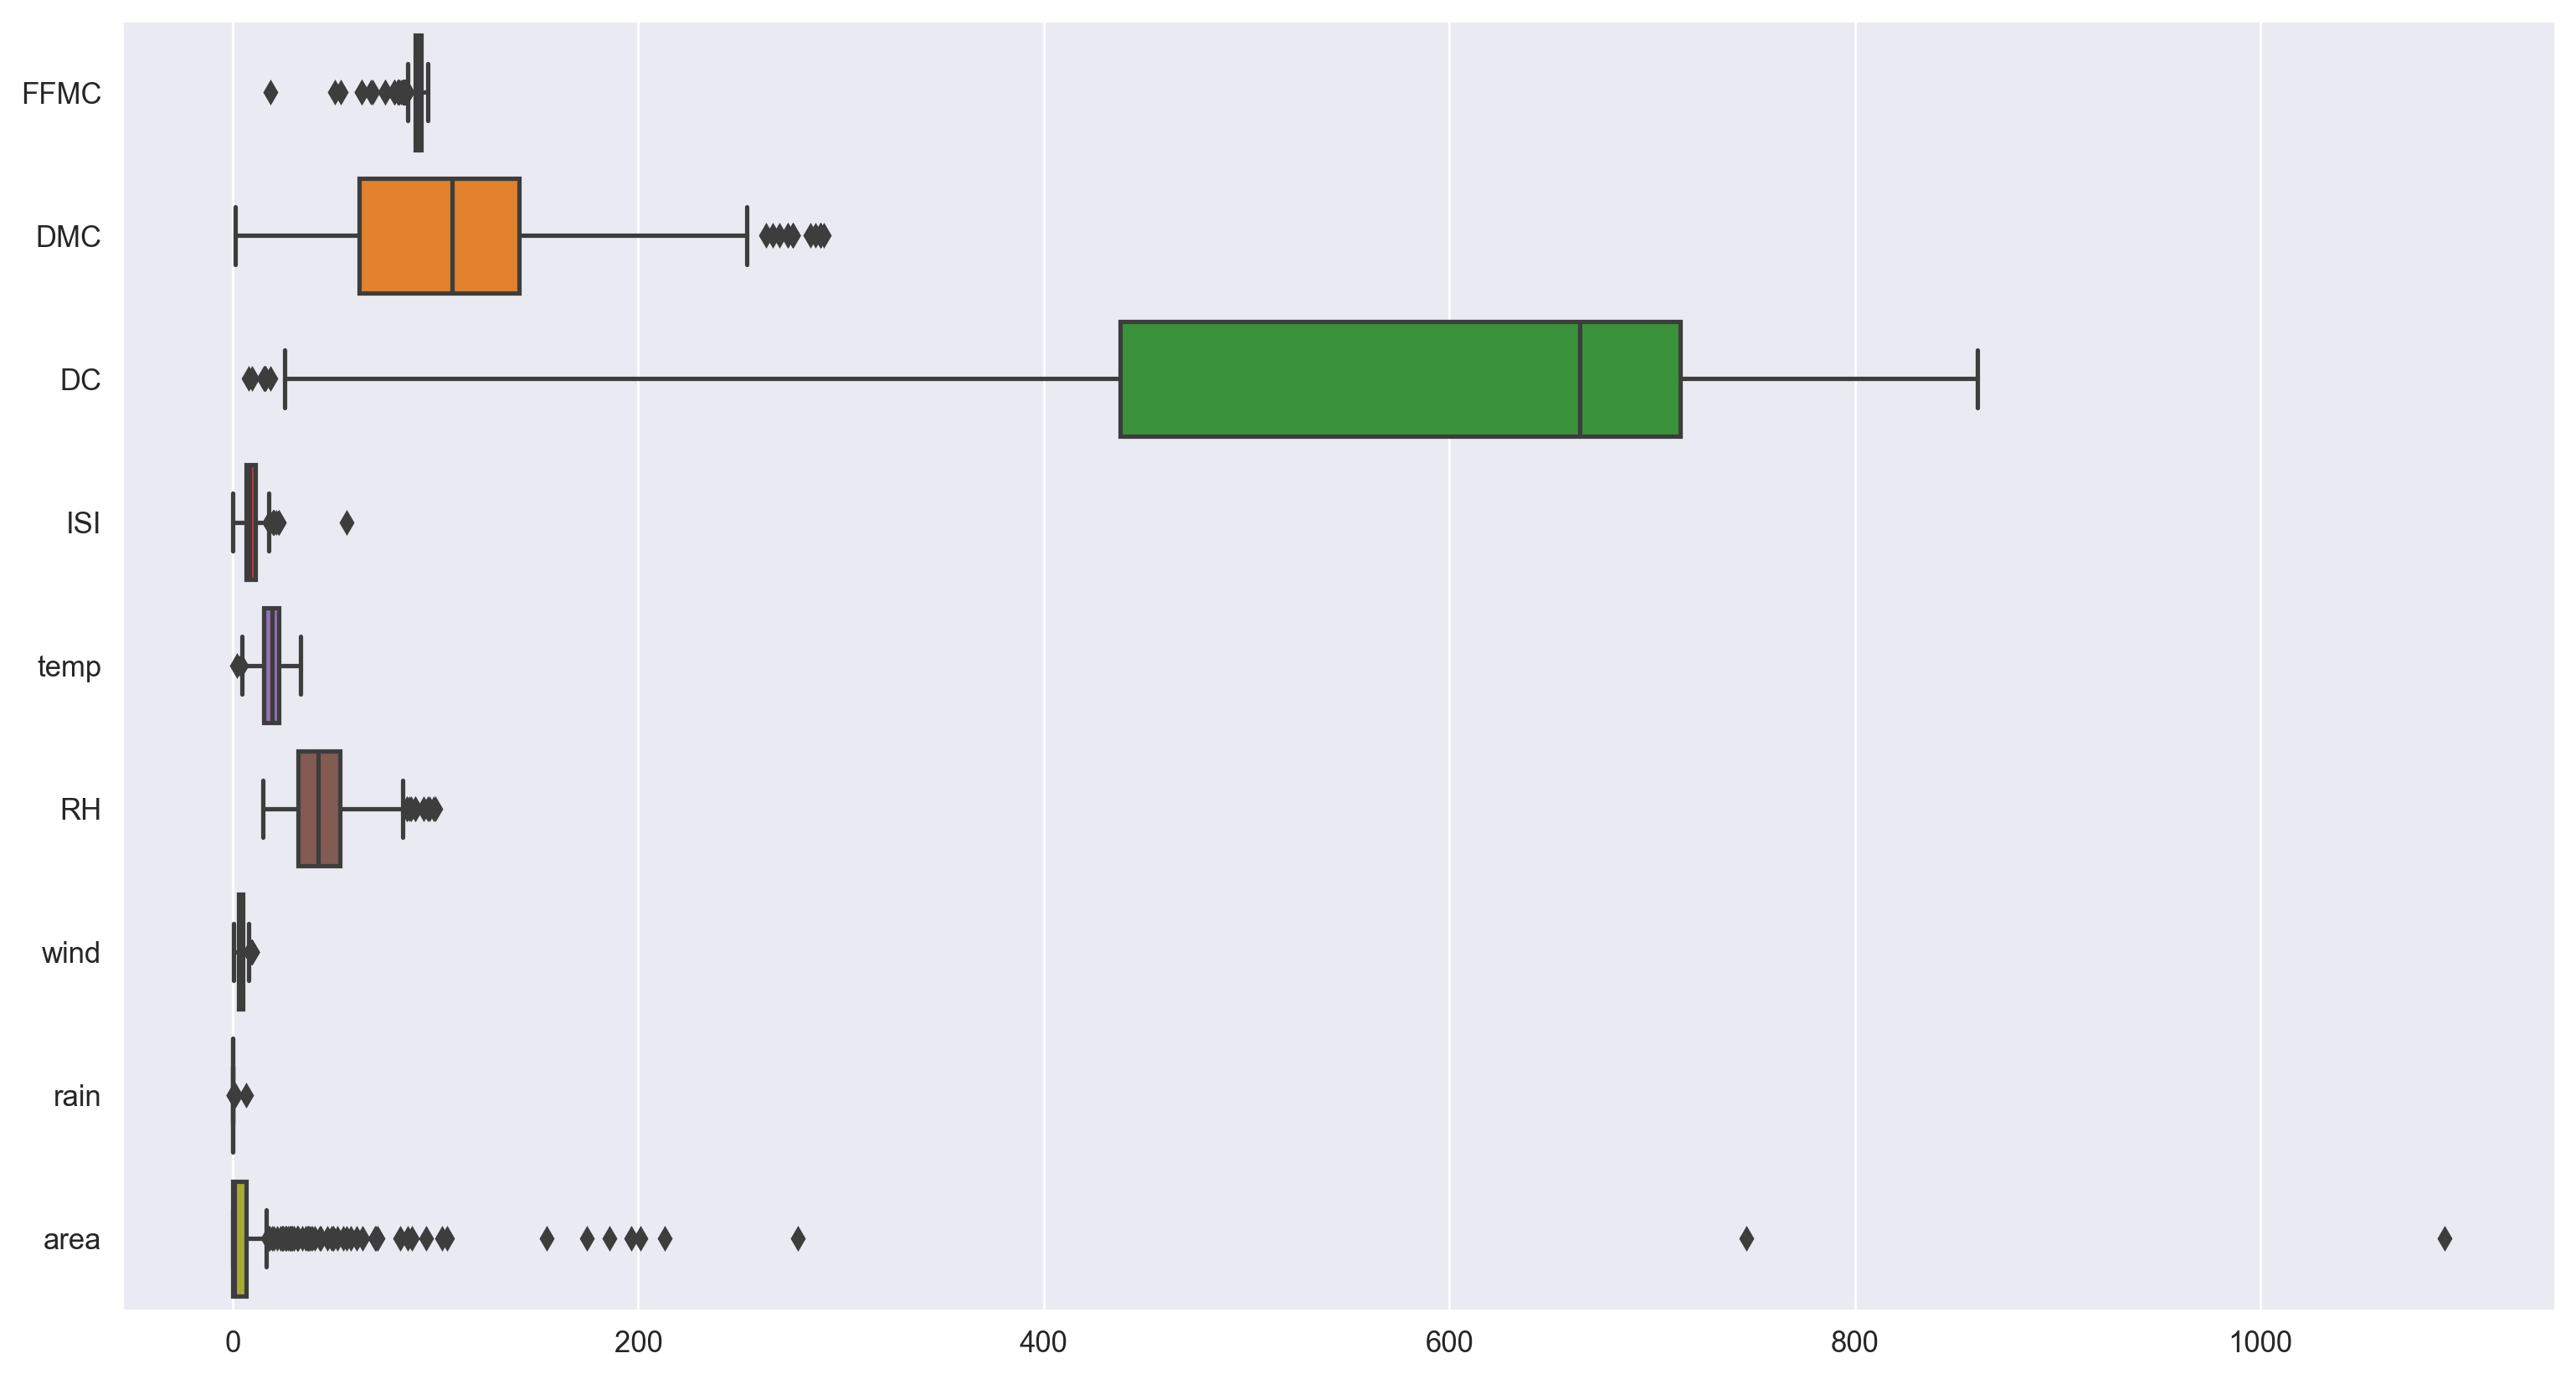

In [ ]:
sns.cubehelix_palette(as_cmap=True)
sns.boxplot(data=ff.iloc[:,2:11],orient='h')

#### Ploting Histplot

array([[<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>],
       [<AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>]], dtype=object)

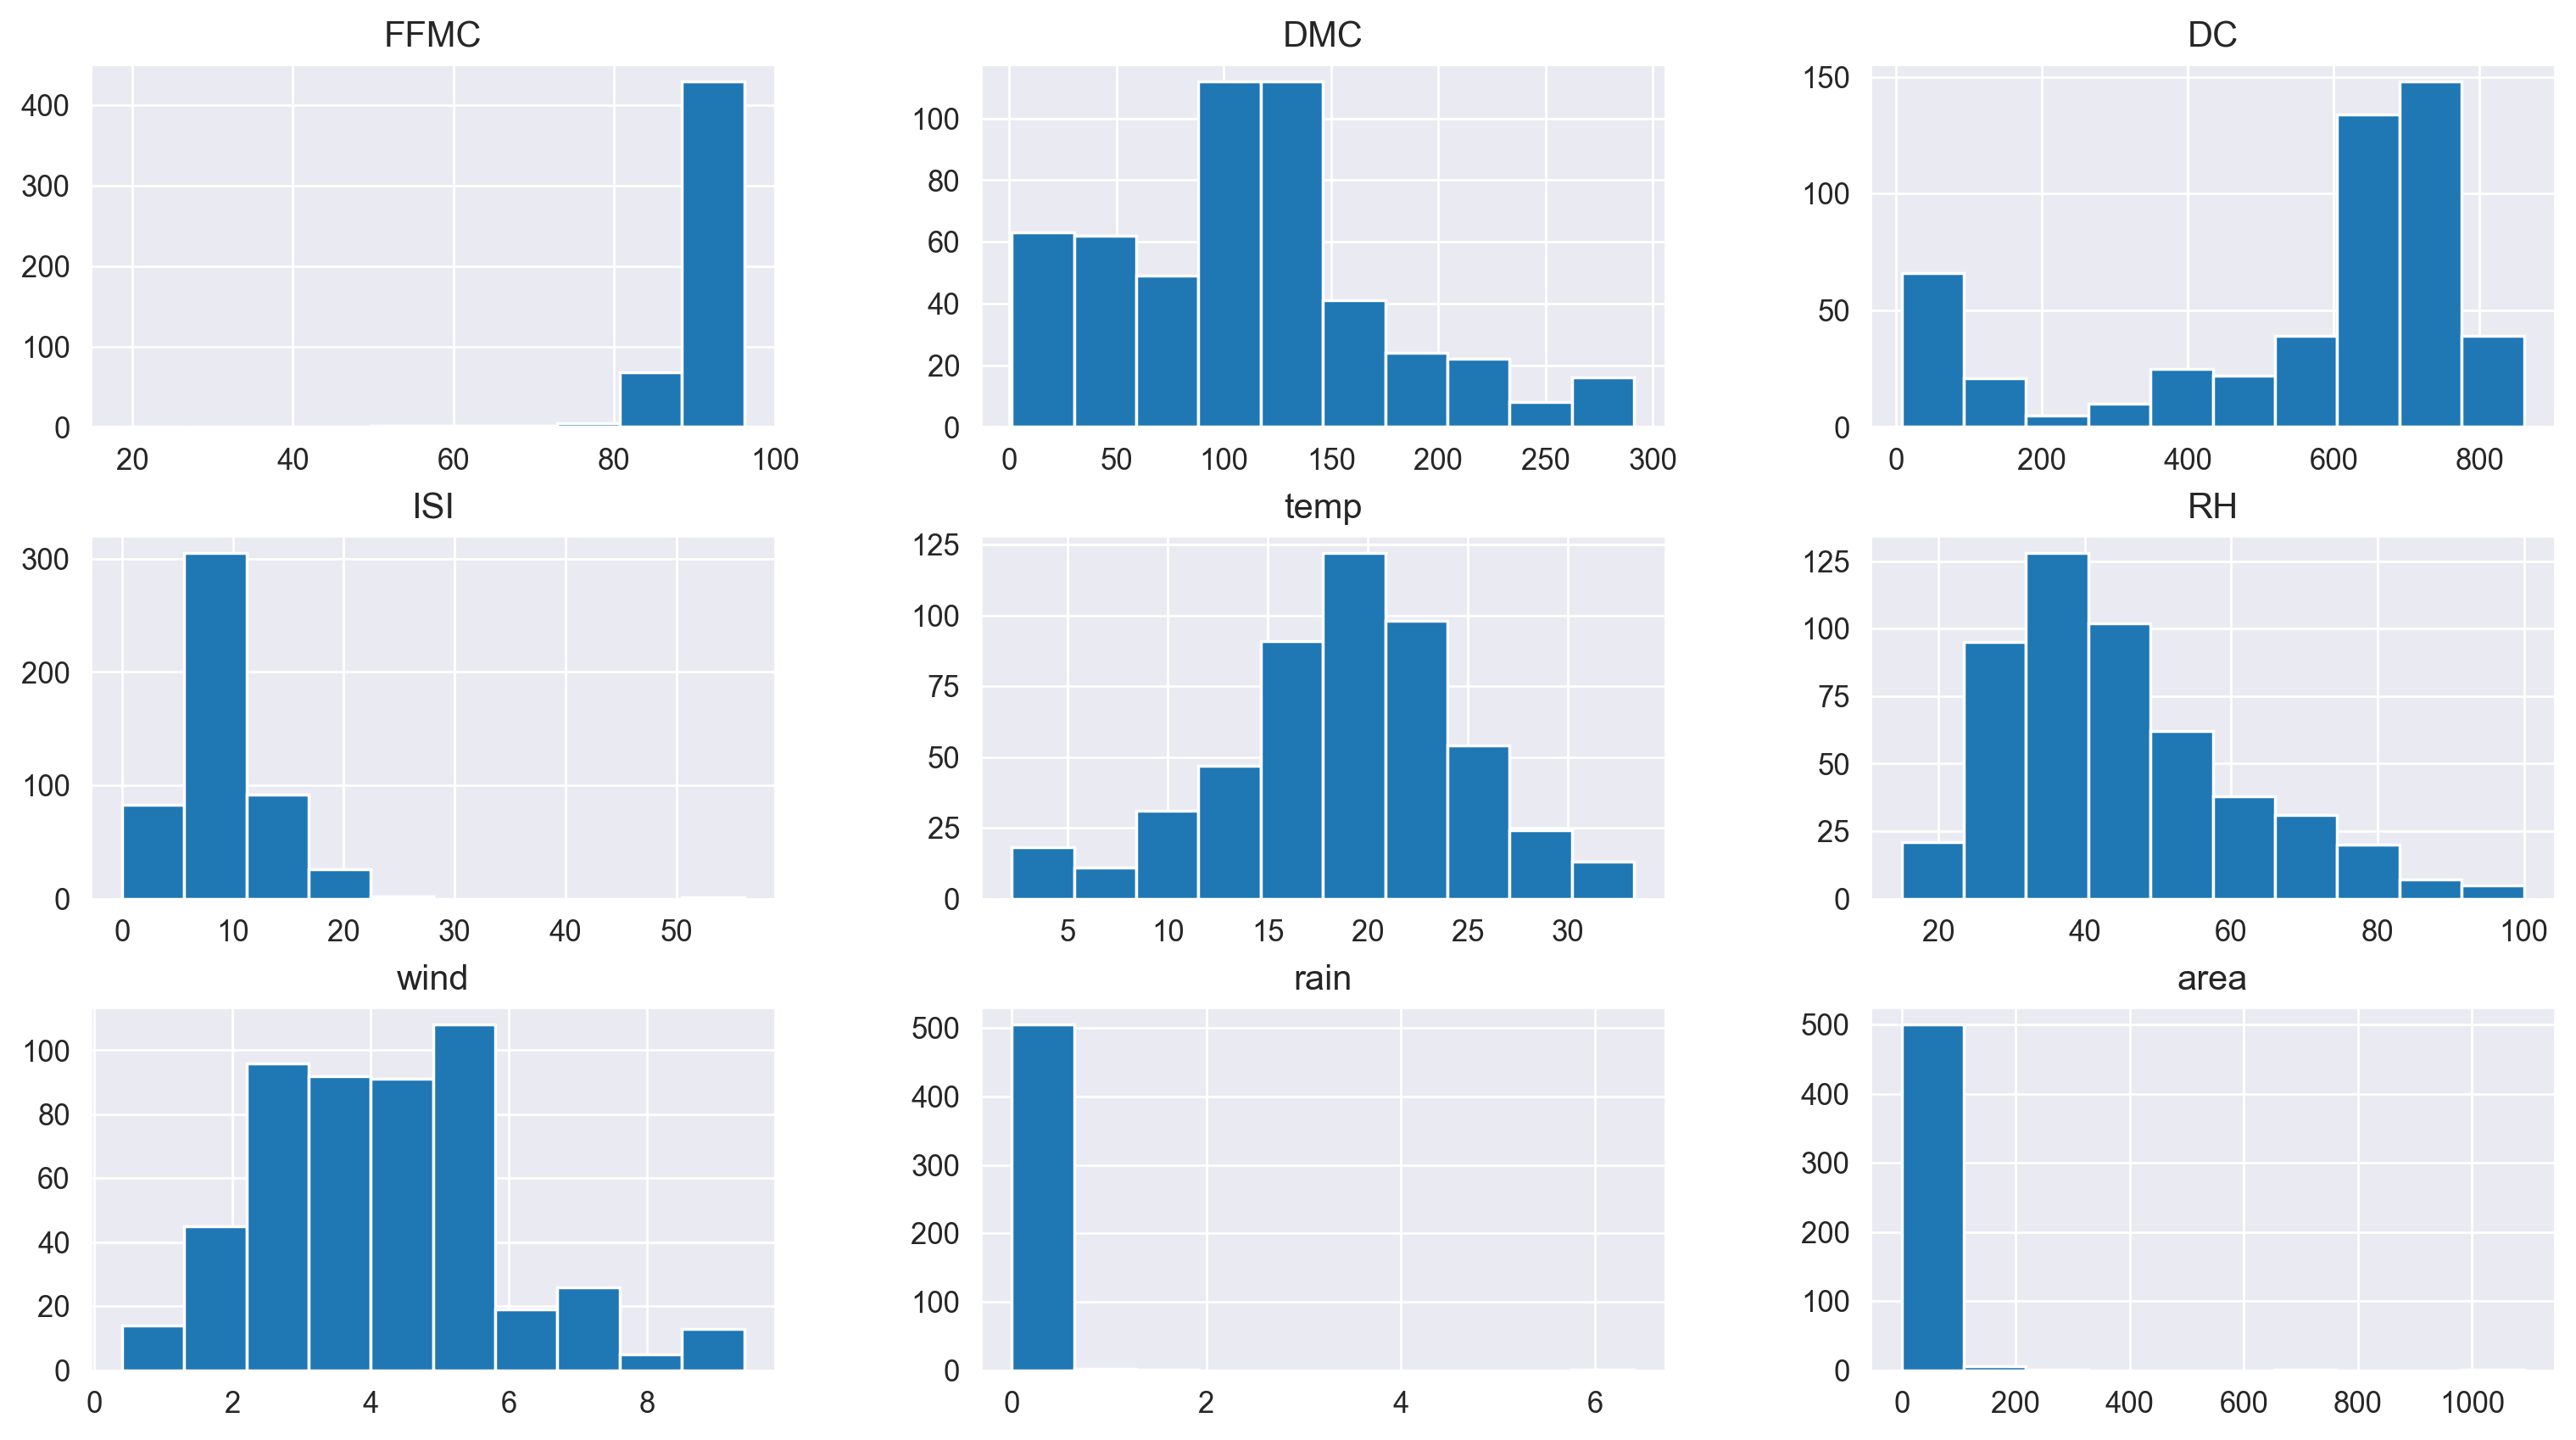

In [ ]:
ff.iloc[:,2:11].hist()

#### Ploting Pie-Plot

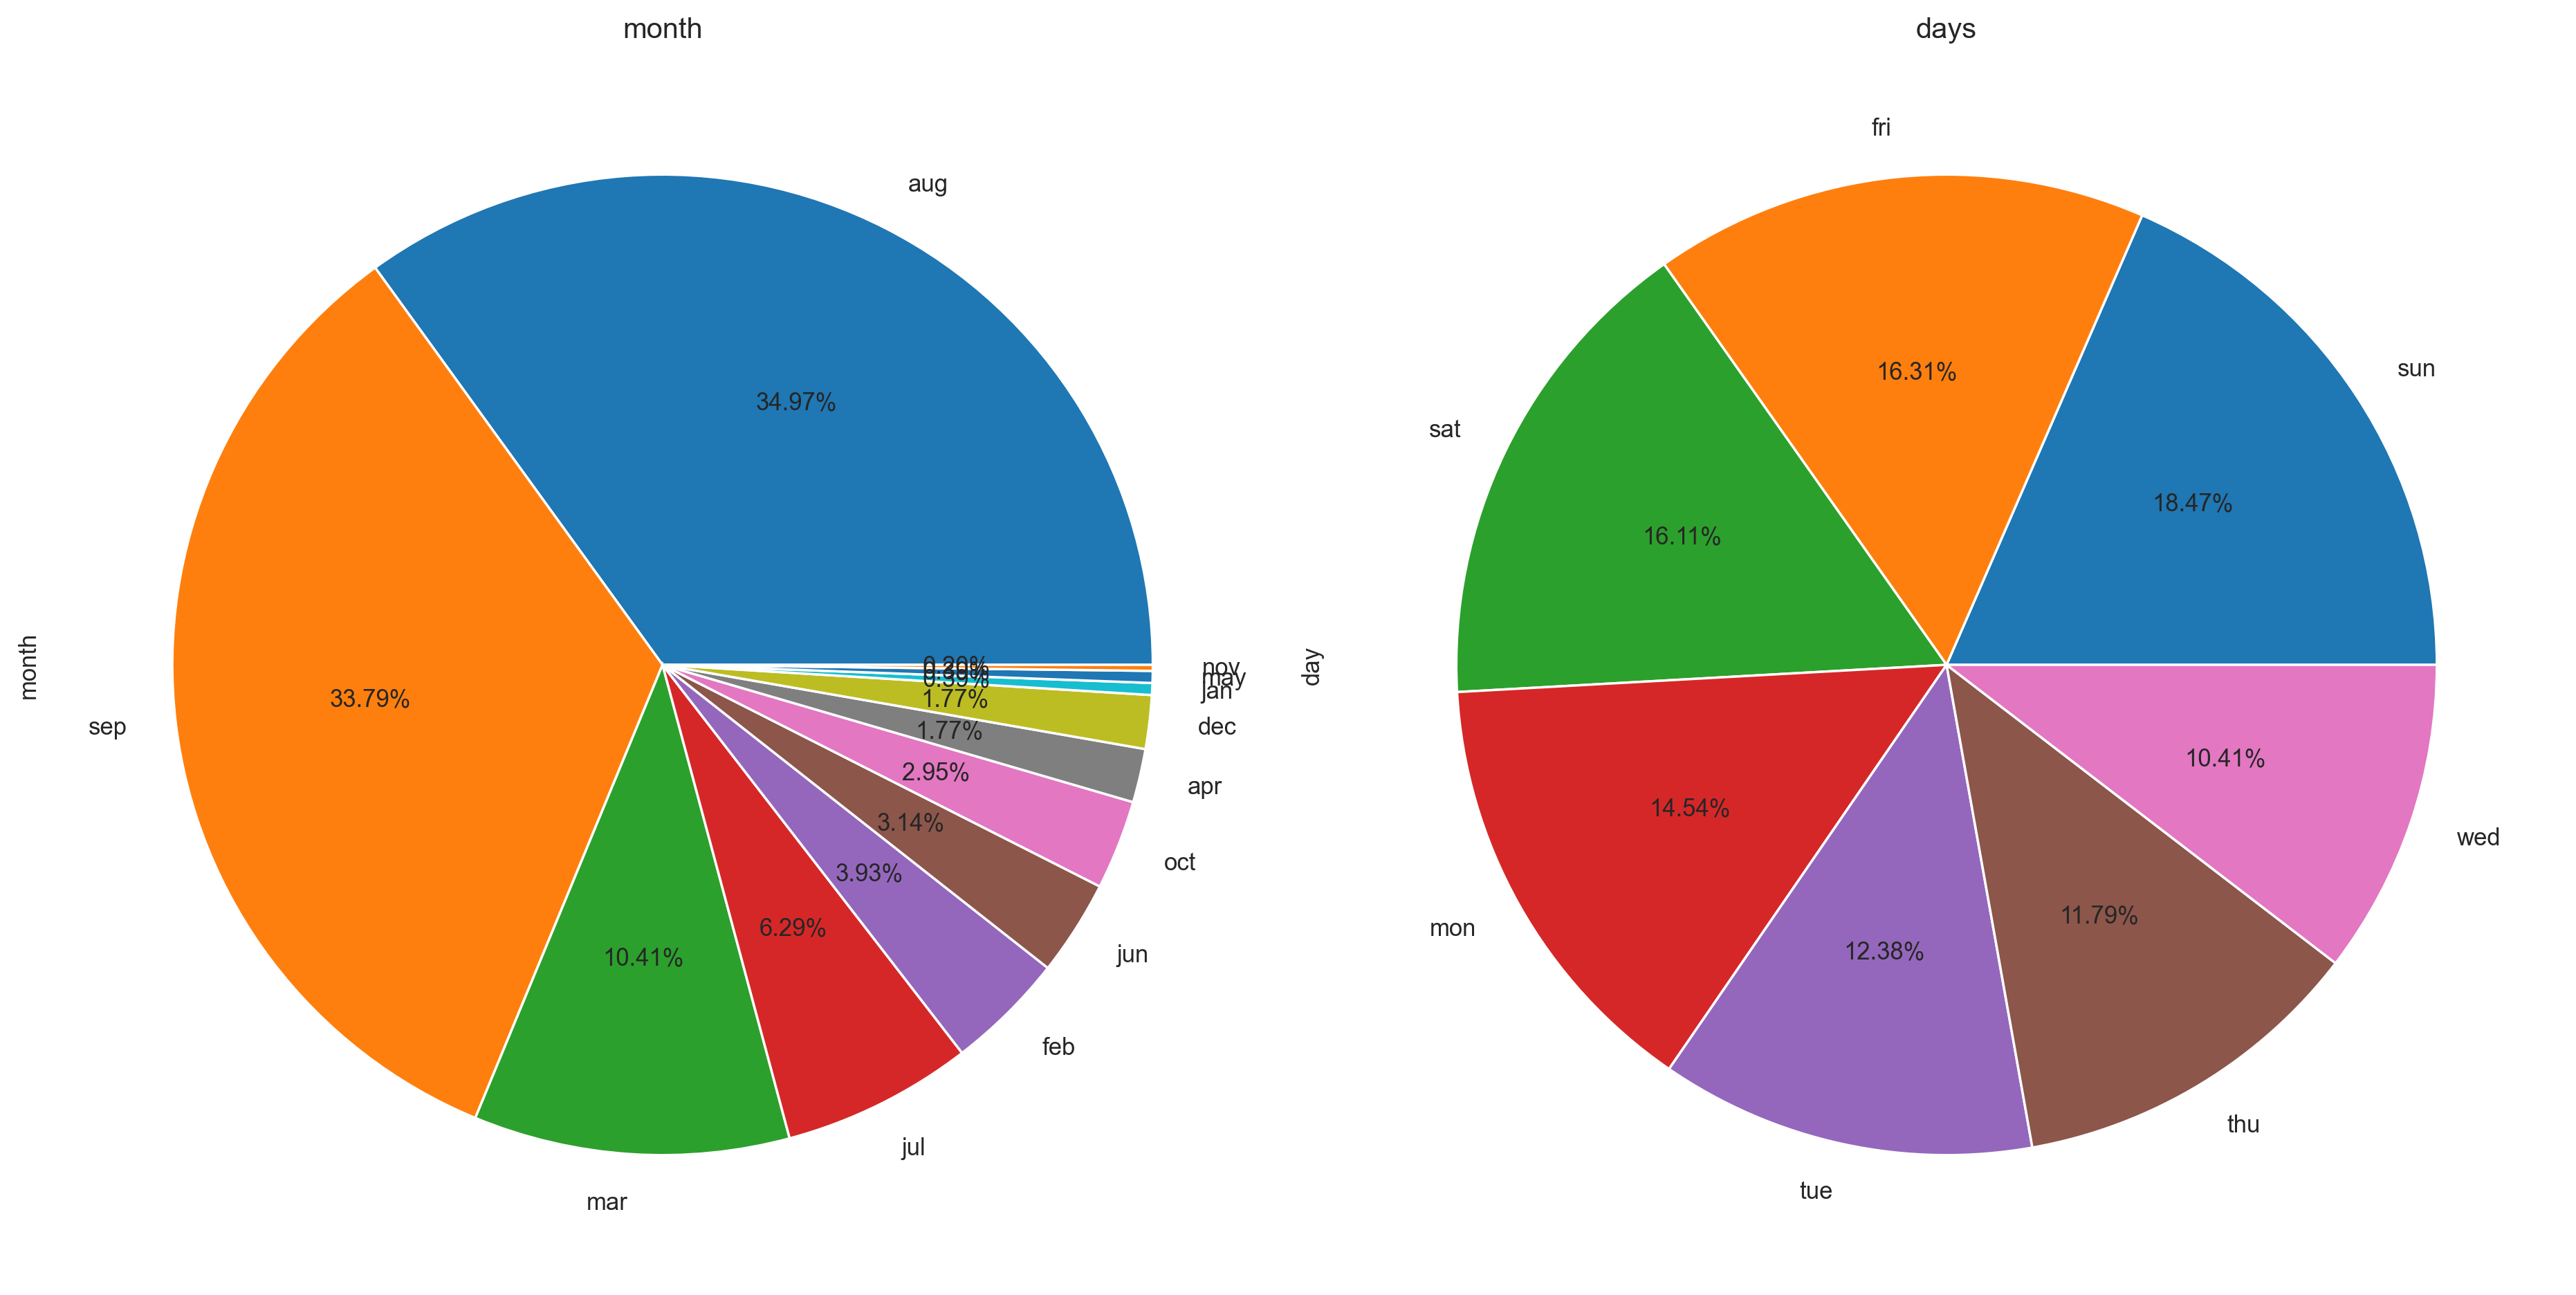

In [ ]:
fig, ax = plt.subplots(ncols=2)
ax[0].title.set_text('month')
ff['month'].value_counts().plot(kind='pie', autopct = '%0.2f%%', ax= ax[0])
ax[1].title.set_text('days')
ff['day'].value_counts().plot(kind='pie', autopct = '%0.2f%%', ax= ax[1])
plt.tight_layout()


### Correlation Analysis

In [ ]:
p = ff.iloc[:,2:11]
p['s'] = ff['size_cat']

p

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area      s
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00  small
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00  small
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00  small
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00  small
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00  small
..    ...    ...    ...   ...   ...  ..   ...   ...    ...    ...
504  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44  large
505  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29  large
506  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16  large
507  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00  small
508  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00  small

[509 rows x 10 columns]

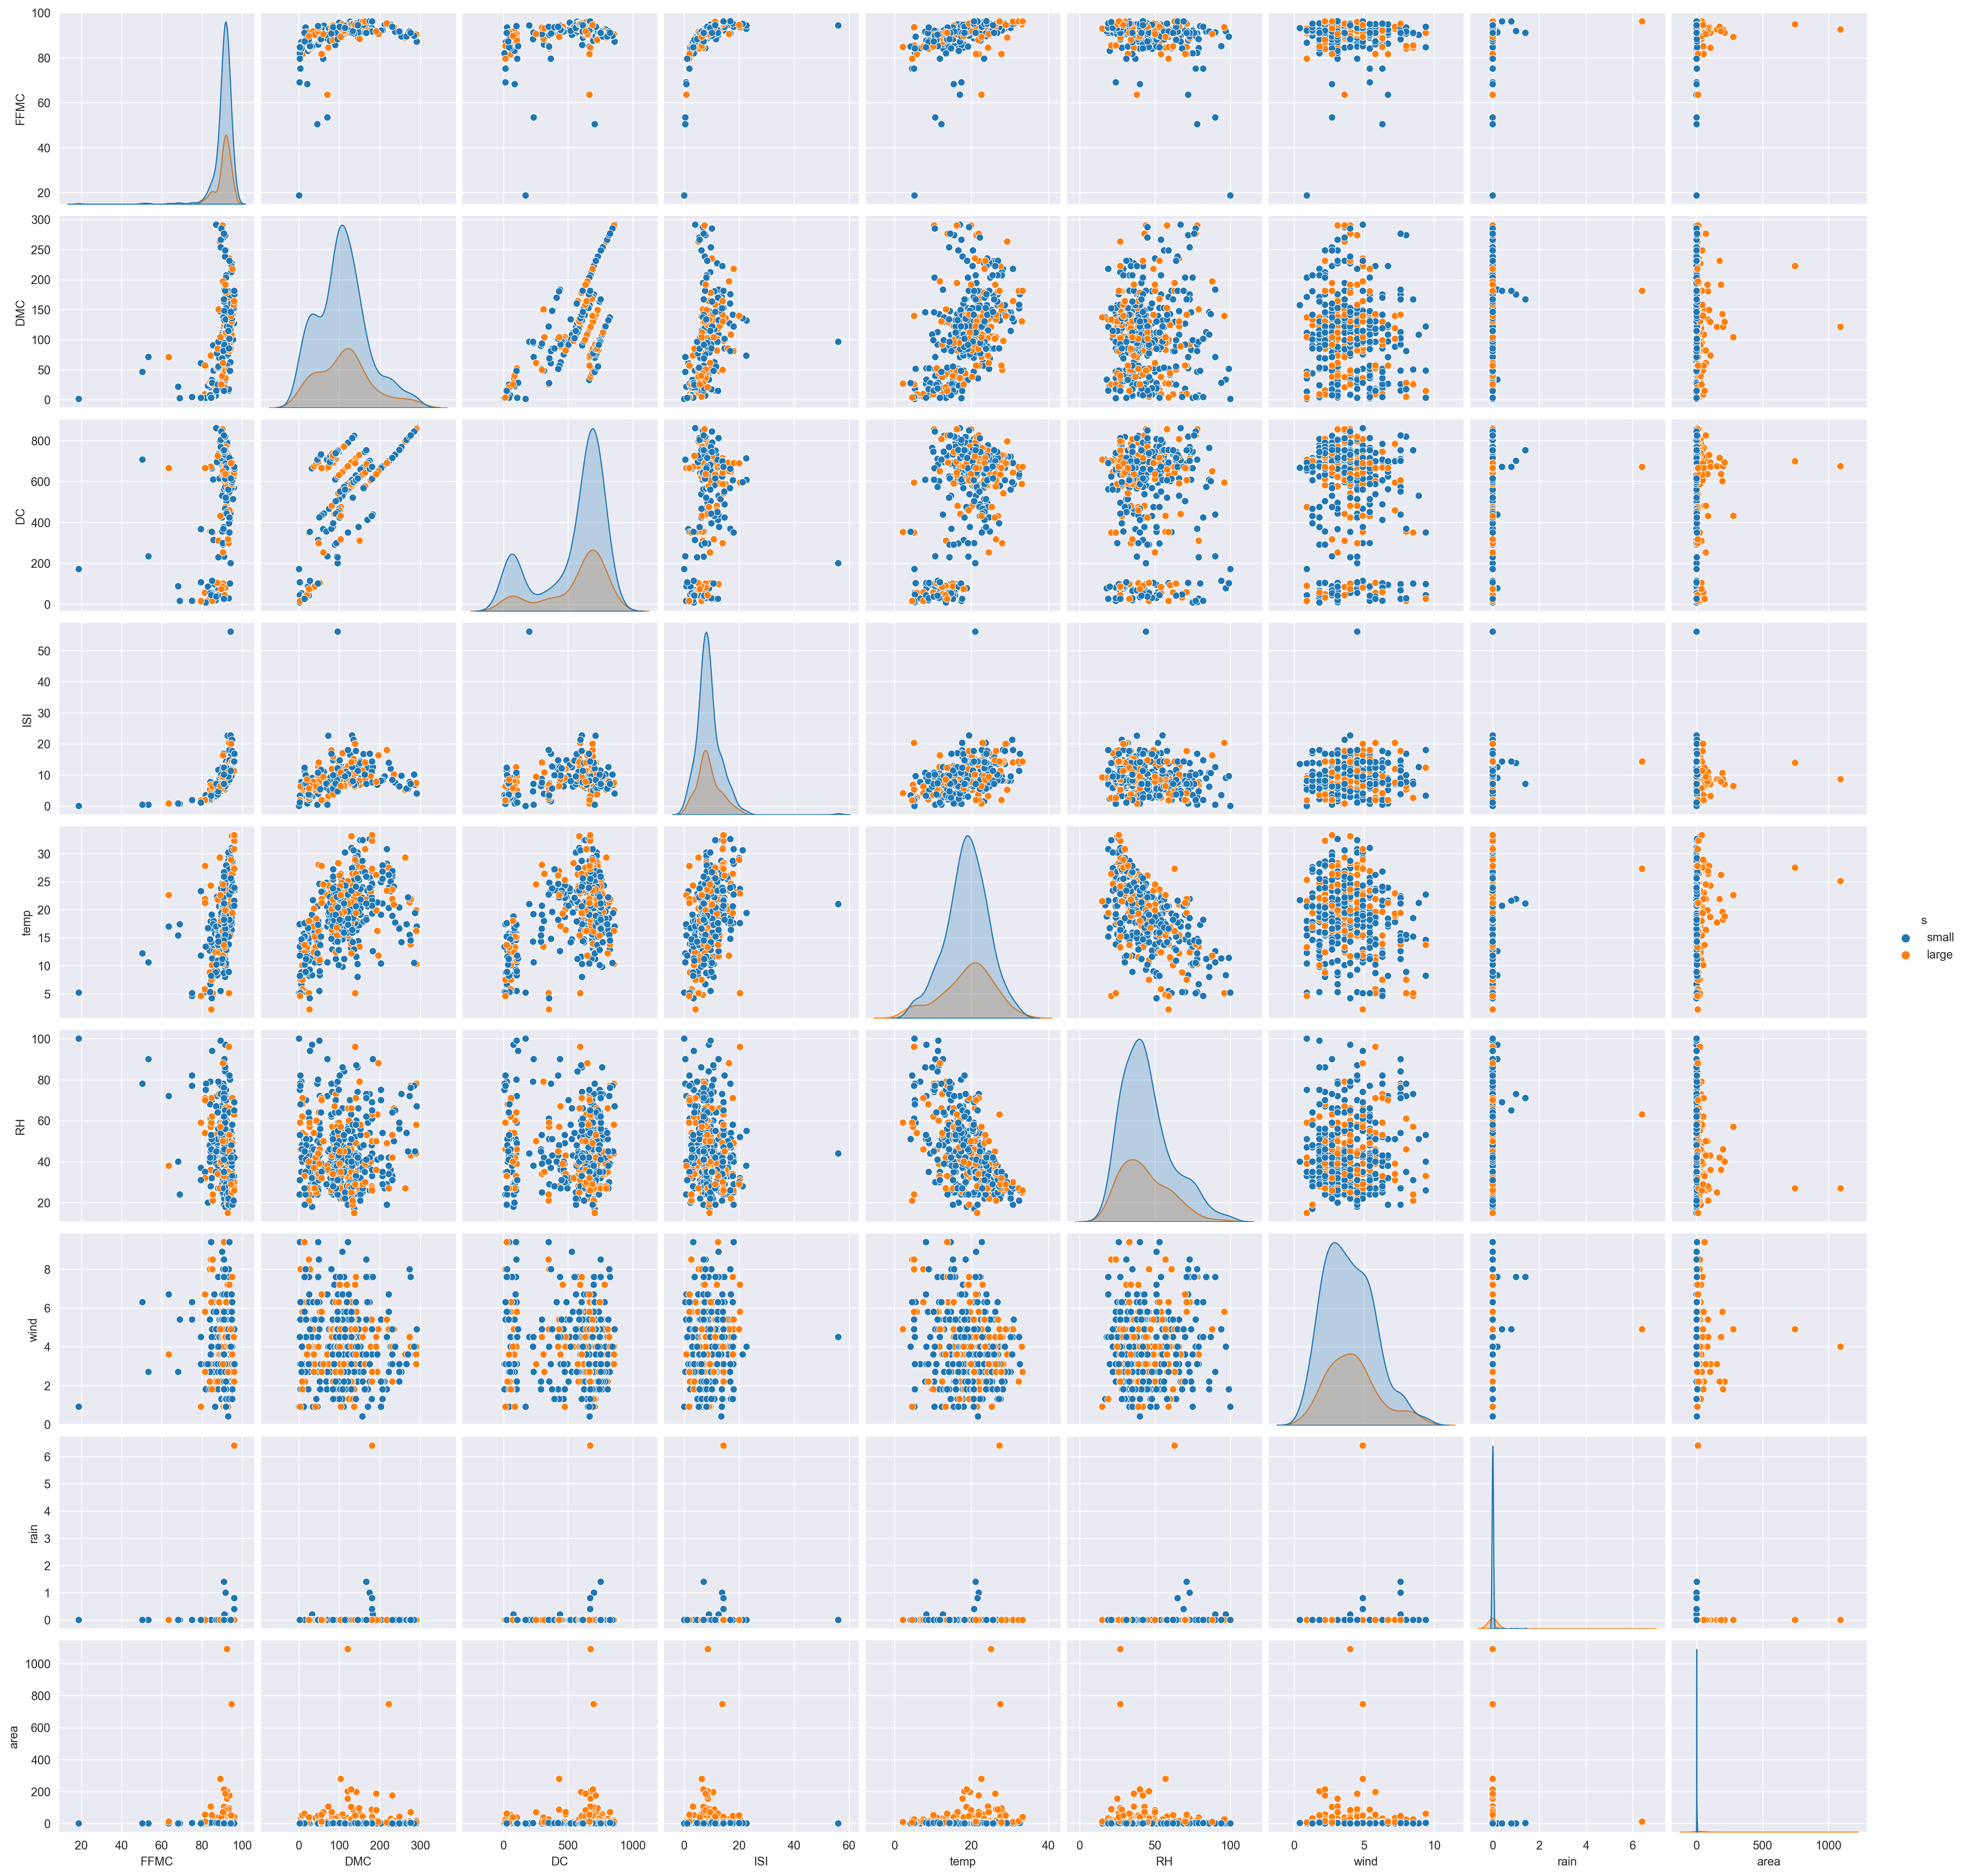

In [ ]:
sns.pairplot(p, hue='s')

plt.show()

<AxesSubplot:>

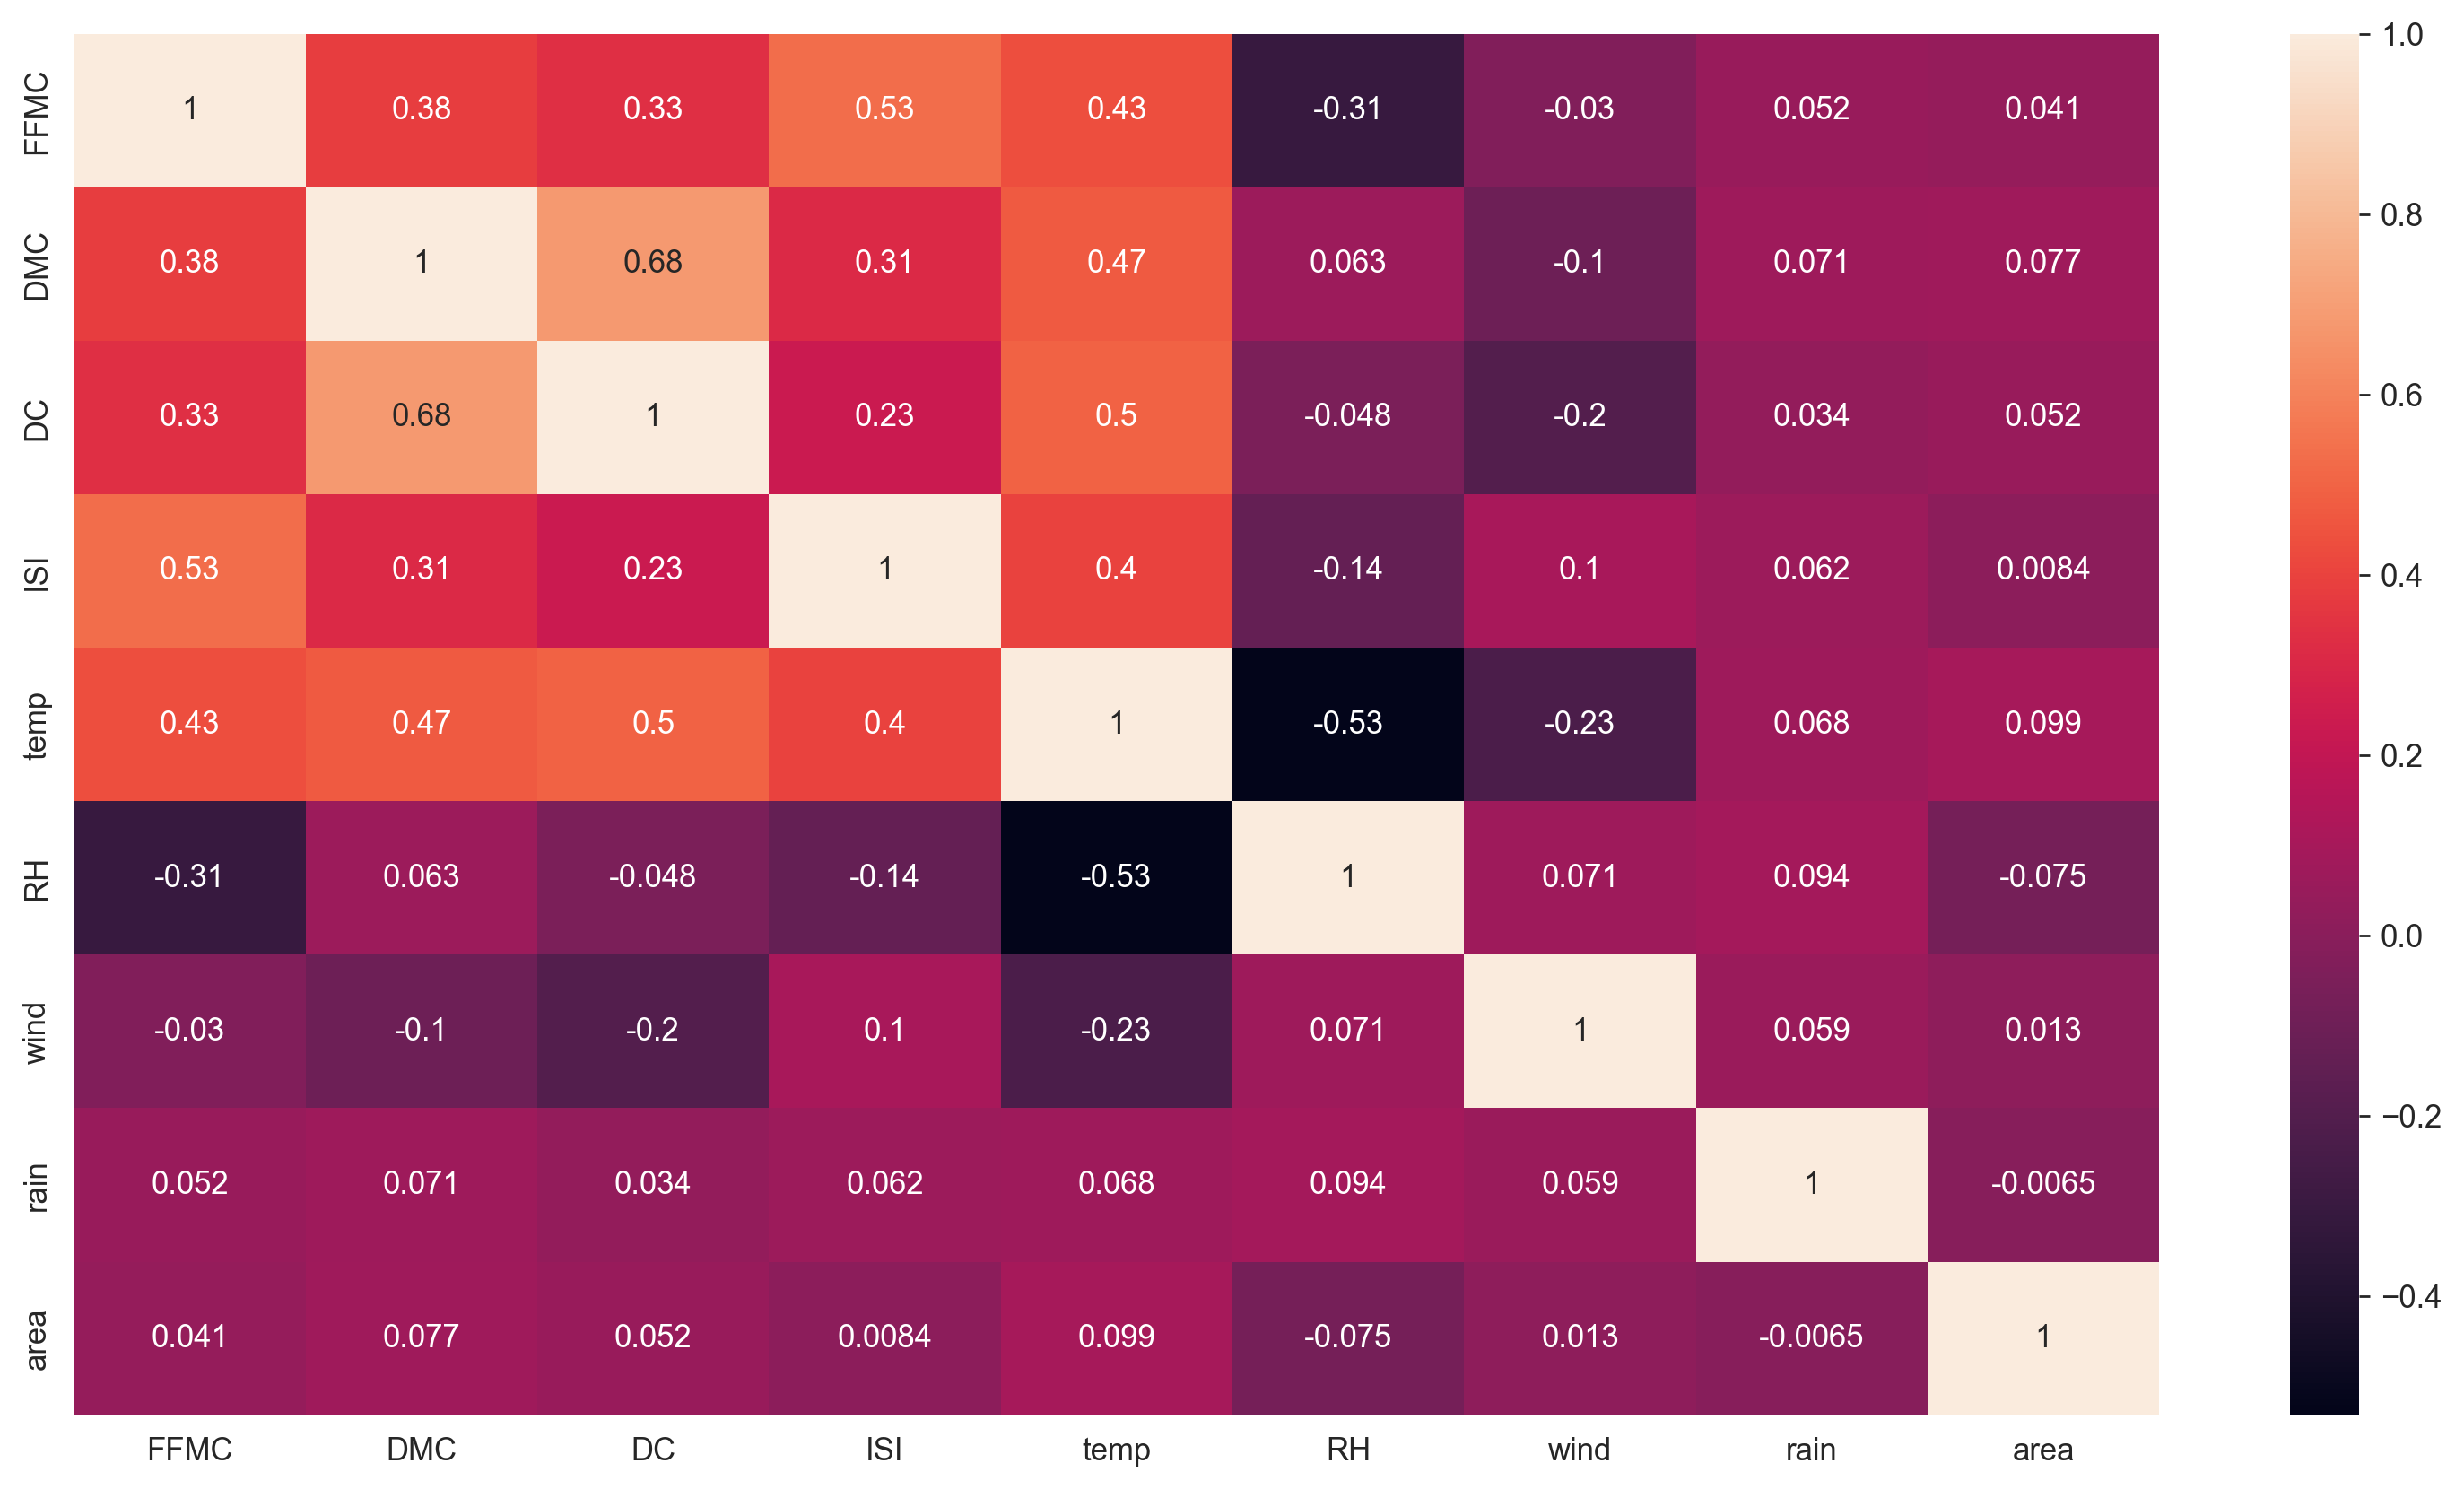

In [ ]:
sns.heatmap(p.corr(), annot=True)

### Converting Categorical Data to Numerical Data

In [ ]:
le = LabelEncoder()

#### Converting ShelveLoc Data to Numerical Data

In [ ]:
ff['size_cat'] = le.fit_transform(ff['size_cat'])

ff

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
504   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
505   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
506   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
507   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
508   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
504         0         0         0         0         0         0         0   
505         0         0         0         0         0         0         0   
506         0         0         0         0         0         0         0   
507         0         0         0         0         0         0         0   
508         0         0         0         0         0         1         0   

     monthsep  size_cat  
0           0         1  
1           0         1  
2           0         1  
3           0         1  
4           0         1  
..        ...       ...  
504         0         0  
505         0         0  
506         0         0  
507         0         1  
508         0         1  

[509 rows x 31 columns]

### Outlier Detection

In [ ]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) +
                      (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100

        print(str(df.columns[i]) + ' : ' + str(percentage) + ' %')


In [ ]:
def replace_outlier_extream(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, upper, inplace=True)
    st[col].mask(st[col] < lower, lower, inplace=True)


In [ ]:
def remove_outlier(st, col):
    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)

    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st = st[(st[col] > lower) & (st[col] < upper)]

    return st


#### Outlier Percentage (Before)

In [ ]:
outlier_percentage(ff.iloc[:,2:11])

FFMC : 10.412573673870334 %
DMC : 3.143418467583497 %
DC : 1.5717092337917484 %
ISI : 2.75049115913556 %
temp : 0.3929273084479371 %
RH : 2.161100196463654 %
wind : 2.5540275049115913 %
rain : 1.37524557956778 %
area : 12.180746561886052 %


#### Using Isolation Forest

In [ ]:
iso = IsolationForest()
iso.fit(ff.iloc[:,2:11])
outliers = iso.predict(ff.iloc[:,2:11])
outliers

array([ 1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

##### Creating Dataframe

In [ ]:
ff['Outliers'] = outliers
ff

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthjan  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
504   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
505   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
506   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
507   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
508   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  \
0           0         0         1         0         0         0         0   
1           0         0         0         0         0         1         0   
2           0         0         0         0         0         1         0   
3           0         0         1         0         0         0         0   
4           0         0         1         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
504         0         0         0         0         0         0         0   
505         0         0         0         0         0         0         0   
506         0         0         0         0         0         0         0   
507         0         0         0         0         0         0         0   
508         0         0         0         0         1         0         0   

     size_cat  Outliers  
0       small         1  
1       small         1  
2       small         1  
3       small        -1  
4       small        -1  
..        ...       ...  
504     large         1  
505     large         1  
506     large         1  
507     small         1  
508     small        -1  

[509 rows x 32 columns]

In [ ]:
ff.drop(ff[ff['Outliers']==-1].index, inplace=True)

#### Outlier Percentage (After Using Isolation Forest)

In [ ]:
outlier_percentage(ff.iloc[:,2:11])

FFMC : 7.974137931034483 %
DMC : 3.4482758620689653 %
DC : 15.517241379310345 %
ISI : 6.0344827586206895 %
temp : 2.1551724137931036 %
RH : 2.3706896551724137 %
wind : 0.646551724137931 %
rain : 0.0 %
area : 11.637931034482758 %


#### Replacing Outlier in FFMC Column

In [ ]:
pe.box(ff['FFMC'], orientation = 'h')

In [ ]:
replace_outlier_extream(ff, 'FFMC')

In [ ]:
pe.box(ff['FFMC'],orientation = 'h')

#### Replacing Outlier in DMC Column

In [ ]:
pe.box(ff['DMC'], orientation = 'h')

In [ ]:
replace_outlier_extream(ff, 'DMC')

In [ ]:
pe.box(ff['DMC'], orientation = 'h')

#### Replacing Outlier in DC Column

In [ ]:
pe.box(ff['DC'], orientation = 'h')

In [ ]:
replace_outlier_extream(ff, 'DC')

In [ ]:
pe.box(ff['DC'], orientation = 'h')

#### Replacing Outlier in ISI Column

In [ ]:
pe.box(ff['ISI'], orientation = 'h')

In [ ]:
replace_outlier_extream(ff, 'ISI')

In [ ]:
pe.box(ff['ISI'], orientation = 'h')

#### Replacing Outlier in Area Column

In [ ]:
pe.box(ff['area'], orientation = 'h')

In [ ]:
replace_outlier_extream(ff, 'area')

In [ ]:
pe.box(ff['area'], orientation = 'h')

#### Outlier Percentage (After)

In [ ]:
outlier_percentage(ff.iloc[:,2:11])

FFMC : 0.0 %
DMC : 0.0 %
DC : 0.0 %
ISI : 0.0 %
temp : 2.1551724137931036 %
RH : 2.3706896551724137 %
wind : 0.646551724137931 %
rain : 0.0 %
area : 0.0 %


#### Reindexing Columns

In [ ]:
ff.reset_index(inplace=True)
ff.drop(columns=['index', 'Outliers'], inplace=True)

ff

month  day     FFMC    DMC      DC   ISI  temp  RH  wind  rain  ...  \
0     mar  fri  86.8375   26.2  130.55   5.1   8.2  51   6.7   0.0  ...   
1     oct  tue  90.6000   35.4  669.10   6.7  18.0  33   0.9   0.0  ...   
2     oct  sat  90.6000   43.7  686.90   6.7  14.6  33   1.3   0.0  ...   
3     aug  sun  92.3000   85.3  488.00  14.7  22.2  29   5.4   0.0  ...   
4     aug  mon  92.3000   88.9  495.60   8.5  24.1  27   3.1   0.0  ...   
..    ...  ...      ...    ...     ...   ...   ...  ..   ...   ...  ...   
459   aug  sun  86.8375   56.7  665.60   1.9  27.8  35   2.7   0.0  ...   
460   aug  sun  86.8375   56.7  665.60   1.9  27.8  32   2.7   0.0  ...   
461   aug  sun  86.8375   56.7  665.60   1.9  21.9  71   5.8   0.0  ...   
462   aug  sun  86.8375   56.7  665.60   1.9  21.2  70   6.7   0.0  ...   
463   aug  sat  94.4000  146.0  614.70  11.3  25.6  42   4.0   0.0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
459         0         0         0         0         0         0         0   
460         0         0         0         0         0         0         0   
461         0         0         0         0         0         0         0   
462         0         0         0         0         0         0         0   
463         0         0         0         0         0         0         0   

     monthoct  monthsep  size_cat  
0           0         0     small  
1           1         0     small  
2           1         0     small  
3           0         0     small  
4           0         0     small  
..        ...       ...       ...  
459         0         0     small  
460         0         0     large  
461         0         0     large  
462         0         0     large  
463         0         0     small  

[464 rows x 31 columns]

## Splitting The Data Into Target and Independent set

In [ ]:
x = ff.iloc[:,2:-1]
y = ff['size_cat']

In [ ]:
x

FFMC    DMC      DC   ISI  temp  RH  wind  rain     area  dayfri  ...  \
0    86.8375   26.2  130.55   5.1   8.2  51   6.7   0.0   0.0000       1  ...   
1    90.6000   35.4  669.10   6.7  18.0  33   0.9   0.0   0.0000       0  ...   
2    90.6000   43.7  686.90   6.7  14.6  33   1.3   0.0   0.0000       0  ...   
3    92.3000   85.3  488.00  14.7  22.2  29   5.4   0.0   0.0000       0  ...   
4    92.3000   88.9  495.60   8.5  24.1  27   3.1   0.0   0.0000       0  ...   
..       ...    ...     ...   ...   ...  ..   ...   ...      ...     ...  ...   
459  86.8375   56.7  665.60   1.9  27.8  35   2.7   0.0   0.0000       0  ...   
460  86.8375   56.7  665.60   1.9  27.8  32   2.7   0.0   6.4400       0  ...   
461  86.8375   56.7  665.60   1.9  21.9  71   5.8   0.0  15.9125       0  ...   
462  86.8375   56.7  665.60   1.9  21.2  70   6.7   0.0  11.1600       0  ...   
463  94.4000  146.0  614.70  11.3  25.6  42   4.0   0.0   0.0000       0  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
459         0         0         0         0         0         0         0   
460         0         0         0         0         0         0         0   
461         0         0         0         0         0         0         0   
462         0         0         0         0         0         0         0   
463         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep  
0           0         0         0  
1           0         1         0  
2           0         1         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
459         0         0         0  
460         0         0         0  
461         0         0         0  
462         0         0         0  
463         0         0         0  

[464 rows x 28 columns]

### Normalizing The Dataset

In [ ]:
sc = StandardScaler()
scaled_x  = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [ ]:
scaled_x

FFMC       DMC        DC       ISI      temp        RH      wind  \
0   -2.113259 -1.478114 -2.019994 -1.091036 -2.085985  0.543443  1.746615   
1   -0.414820 -1.315887  0.450192 -0.641805 -0.249013 -0.689936 -1.805482   
2   -0.414820 -1.169530  0.531836 -0.641805 -0.886329 -0.689936 -1.560510   
3    0.352581 -0.435984 -0.380466  1.604347  0.538261 -0.964020  0.950455   
4    0.352581 -0.372504 -0.345607 -0.136421  0.894409 -1.101062 -0.458135   
..        ...       ...       ...       ...       ...       ...       ...   
459 -2.113259 -0.940297  0.434138 -1.989496  1.587960 -0.552894 -0.703107   
460 -2.113259 -0.940297  0.434138 -1.989496  1.587960 -0.758457 -0.703107   
461 -2.113259 -0.940297  0.434138 -1.989496  0.482028  1.913863  1.195428   
462 -2.113259 -0.940297  0.434138 -1.989496  0.350815  1.845342  1.746615   
463  1.300546  0.634359  0.200674  0.649732  1.175578 -0.073247  0.093052   

     rain      area    dayfri  ...  monthdec  monthfeb  monthjan  monthjul  \
0     0.0 -0.688285  2.277425  ...  -0.08067 -0.169779       0.0 -0.258199   
1     0.0 -0.688285 -0.439092  ...  -0.08067 -0.169779       0.0 -0.258199   
2     0.0 -0.688285 -0.439092  ...  -0.08067 -0.169779       0.0 -0.258199   
3     0.0 -0.688285 -0.439092  ...  -0.08067 -0.169779       0.0 -0.258199   
4     0.0 -0.688285 -0.439092  ...  -0.08067 -0.169779       0.0 -0.258199   
..    ...       ...       ...  ...       ...       ...       ...       ...   
459   0.0 -0.688285 -0.439092  ...  -0.08067 -0.169779       0.0 -0.258199   
460   0.0  0.474113 -0.439092  ...  -0.08067 -0.169779       0.0 -0.258199   
461   0.0  2.183867 -0.439092  ...  -0.08067 -0.169779       0.0 -0.258199   
462   0.0  1.326057 -0.439092  ...  -0.08067 -0.169779       0.0 -0.258199   
463   0.0 -0.688285 -0.439092  ...  -0.08067 -0.169779       0.0 -0.258199   

     monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  
0   -0.169779  2.910221 -0.065795       0.0 -0.182777 -0.739369  
1   -0.169779 -0.343616 -0.065795       0.0  5.471136 -0.739369  
2   -0.169779 -0.343616 -0.065795       0.0  5.471136 -0.739369  
3   -0.169779 -0.343616 -0.065795       0.0 -0.182777 -0.739369  
4   -0.169779 -0.343616 -0.065795       0.0 -0.182777 -0.739369  
..        ...       ...       ...       ...       ...       ...  
459 -0.169779 -0.343616 -0.065795       0.0 -0.182777 -0.739369  
460 -0.169779 -0.343616 -0.065795       0.0 -0.182777 -0.739369  
461 -0.169779 -0.343616 -0.065795       0.0 -0.182777 -0.739369  
462 -0.169779 -0.343616 -0.065795       0.0 -0.182777 -0.739369  
463 -0.169779 -0.343616 -0.065795       0.0 -0.182777 -0.739369  

[464 rows x 28 columns]

### Splitting The Data Into Training And Testing Set

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled_x,y,train_size=0.75,random_state=1)

In [ ]:
xtrain

FFMC       DMC        DC       ISI      temp        RH      wind  \
392  0.036592  1.256815  0.192876 -0.389113  0.988132  0.063795  0.093052   
341 -0.189114  0.392782  1.106095  0.986655 -0.548926 -1.101062 -0.151920   
146  1.481111 -0.030417  0.349284  2.134298 -0.548926  0.269359 -1.560510   
369  0.803993 -1.067257 -1.253321  1.407808  1.625449 -0.621415  0.399268   
417  0.036592  2.218052  0.838688 -0.754113 -0.511437  1.091611 -0.703107   
..        ...       ...       ...       ...       ...       ...       ...   
255  0.262298  0.750739  0.400197  1.492039  0.463283  0.886048 -0.458135   
72  -1.769057 -1.019647 -2.019994 -1.119113 -2.067240  1.982384 -0.458135   
396  0.939417  2.205488  0.697876  0.312809  0.294581  1.571258  0.644240   
235  0.713711  0.833616  0.439184  1.267424  1.400514 -1.238104 -0.458135   
37  -0.595385 -0.231437  0.244248 -0.024113 -0.174034 -0.073247  1.746615   

     rain      area    dayfri  ...  monthdec  monthfeb  monthjan  monthjul  \
392   0.0 -0.110696 -0.439092  ...  -0.08067 -0.169779       0.0 -0.258199   
341   0.0 -0.688285 -0.439092  ...  -0.08067 -0.169779       0.0 -0.258199   
146   0.0 -0.406711 -0.439092  ...  -0.08067 -0.169779       0.0 -0.258199   
369   0.0  0.784567 -0.439092  ...  -0.08067 -0.169779       0.0 -0.258199   
417   0.0 -0.688285 -0.439092  ...  -0.08067 -0.169779       0.0 -0.258199   
..    ...       ...       ...  ...       ...       ...       ...       ...   
255   0.0 -0.594427 -0.439092  ...  -0.08067 -0.169779       0.0 -0.258199   
72    0.0 -0.688285 -0.439092  ...  -0.08067 -0.169779       0.0 -0.258199   
396   0.0  2.080533 -0.439092  ...  -0.08067 -0.169779       0.0 -0.258199   
235   0.0 -0.565548 -0.439092  ...  -0.08067 -0.169779       0.0 -0.258199   
37    0.0 -0.688285 -0.439092  ...  -0.08067 -0.169779       0.0 -0.258199   

     monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  
392 -0.169779 -0.343616 -0.065795       0.0 -0.182777 -0.739369  
341 -0.169779 -0.343616 -0.065795       0.0 -0.182777  1.352504  
146 -0.169779 -0.343616 -0.065795       0.0 -0.182777 -0.739369  
369  5.890018 -0.343616 -0.065795       0.0 -0.182777 -0.739369  
417 -0.169779 -0.343616 -0.065795       0.0 -0.182777 -0.739369  
..        ...       ...       ...       ...       ...       ...  
255 -0.169779 -0.343616 -0.065795       0.0 -0.182777 -0.739369  
72  -0.169779  2.910221 -0.065795       0.0 -0.182777 -0.739369  
396 -0.169779 -0.343616 -0.065795       0.0 -0.182777 -0.739369  
235 -0.169779 -0.343616 -0.065795       0.0 -0.182777 -0.739369  
37  -0.169779 -0.343616 -0.065795       0.0 -0.182777 -0.739369  

[348 rows x 28 columns]

## Preparing Model From The Dataset

### Creating Model With SVC

In [ ]:
model_def = SVC()
model_def.fit(xtrain,ytrain)
ypred = model_def.predict(xtest)

#### Evaluating The Model

##### Creating Classification Report

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       large       1.00      0.68      0.81        38
       small       0.87      1.00      0.93        78

    accuracy                           0.90       116
   macro avg       0.93      0.84      0.87       116
weighted avg       0.91      0.90      0.89       116



##### Comparing Training And Testing Accuracy

In [ ]:
print('Training Accuracy of are Model is : ' + str(model_def.score(xtrain,ytrain)))
print('Testing Accuracy of are Model is : ' + str(model_def.score(xtest, ytest)))

Training Accuracy of are Model is : 0.9655172413793104
Testing Accuracy of are Model is : 0.896551724137931


### Performing Hyperparameter Tuning On SVC

In [ ]:
params = {
    'C' : [0.1, 0.001, 0.0001, 1, 10,100],
    'kernel' : ['rbf', 'poly', 'linear', 'sigmoid'],
    'gamma' : [0.01, 0.1, 0.001, 1, 10, 100]
}

In [ ]:
grid = GridSearchCV(SVC(), param_grid=params, verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 0.0001, 1, 10, 100],
                         'gamma': [0.01, 0.1, 0.001, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             verbose=1)

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}

### Creating Final Model With Hyperparameter Value

In [ ]:
model_def = SVC(C = 1, gamma = 0.01, kernel = 'linear')
model_def.fit(xtrain,ytrain)
ypred = model_def.predict(xtest)

#### Evaluating The Model

##### Creating Classification Report

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       large       0.97      0.89      0.93        38
       small       0.95      0.99      0.97        78

    accuracy                           0.96       116
   macro avg       0.96      0.94      0.95       116
weighted avg       0.96      0.96      0.96       116



##### Comparing Training And Testing Accuracy

In [ ]:
print('Training Accuracy of are Model is : ' + str(model_def.score(xtrain,ytrain)))
print('Testing Accuracy of are Model is : ' + str(model_def.score(xtest, ytest)))

Training Accuracy of are Model is : 0.9971264367816092
Testing Accuracy of are Model is : 0.9568965517241379
